In [1]:
import os
from cisclient.client import CISClient
from cisvis.spectra import generate_similarity_plot, generate_spectra_plot, to_dataframe, generate_histogram_intensity, \
    generate_histogram_accurate_mass, generate_histogram_ri

In [2]:
# these will later be parameterized
os.environ['CIS_URL'] = 'https://dev-api.metabolomics.us/cis'
os.environ['CIS_API_TOKEN'] = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
splash = 'splash10-0002-0090500000-53c0a0bd55cd73db3ed9'
library = 'soqe[M-H] | QExactive | test | negative'

In [3]:
client =  CISClient(os.getenv('CIS_URL'), os.getenv('CIS_API_TOKEN'))

compound = client.get_compound(library=library,splash=splash)
members = list( map(lambda member: client.get_compound(library=library,splash=member),client.get_members(library=library,splash=splash)))

In [4]:
to_dataframe([compound]).drop(['spectrum','ms_level','required_for_correction','inchi_key','splash','unique_mass'],axis=1)

,id,accurate_mass,target_type,matrix,method,retention_index,sample,name,precursor_mass
0,646832,663.365112,CONFIRMED_CONSENSUS,,soqe[M-H] | QExactive | test | negative,162.163492,unknown,unknown_663.3651_162.1635,663.365112


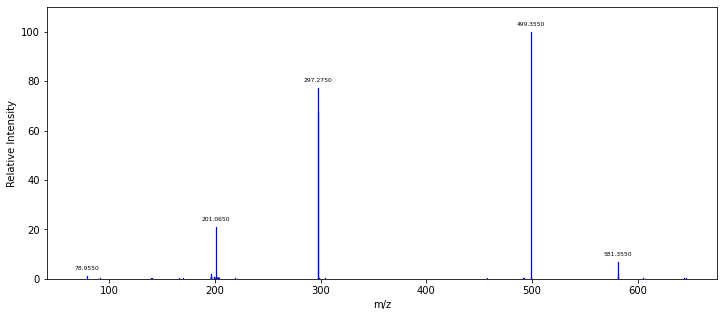

In [5]:
generate_spectra_plot(compound=compound)

TypeError: 'AxesSubplot' object is not subscriptable

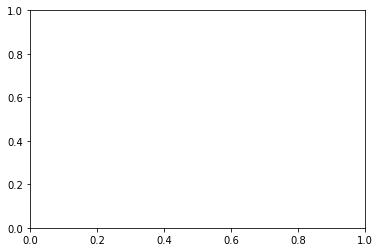

In [6]:
generate_similarity_plot(members)

In [ ]:
generate_histogram_ri(members)

In [ ]:
generate_histogram_accurate_mass(members)

In [ ]:
generate_histogram_intensity(members)

In [ ]:
to_dataframe(members).drop(['spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)
